In [2]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from cmehr.utils.file_utils import save_pkl, load_pkl

In [6]:
proto_8 = load_pkl("/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/train_proto_8.pkl")
proto_16 = load_pkl("/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/train_proto_16.pkl")
proto_25 = load_pkl("/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/train_proto_25.pkl")
proto_50 = load_pkl("/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/train_proto_50.pkl")
proto_100 = load_pkl("/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/train_proto_100.pkl")
proto_list = [proto_8, proto_16, proto_25, proto_50, proto_100]
train_embs = load_pkl("/home/fywang/Documents/EHR_codebase/MMMSPG/prototype_results/mimic4_pretrain/self_supervised_embs.pkl")

In [7]:
train_ts_embs = train_embs["train_ts_embs"].reshape(-1, 128)
train_ts_embs = train_ts_embs
for i, n_proto in enumerate([8, 16, 25, 50, 100]):
    # print(f"Prototype {n_proto}")
    prototypes = proto_list[i]["prototypes"][0]
    prototypes = prototypes
    # dist_mat = np.linalg.norm(train_ts_embs - prototypes, axis=1)
    dist_mat = euclidean_distances(train_ts_embs, prototypes)
    sum_dist = np.sum(dist_mat.min(axis=1))
    print(sum_dist)

419804.3
405103.56
396202.22
383312.03
369973.9


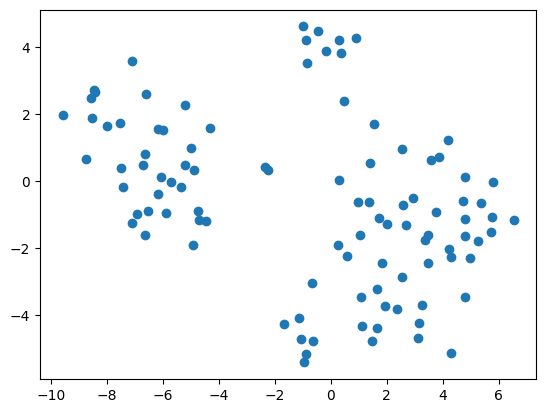

In [41]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300).fit_transform(prototypes)
plt.scatter(tsne[:, 0], tsne[:, 1])

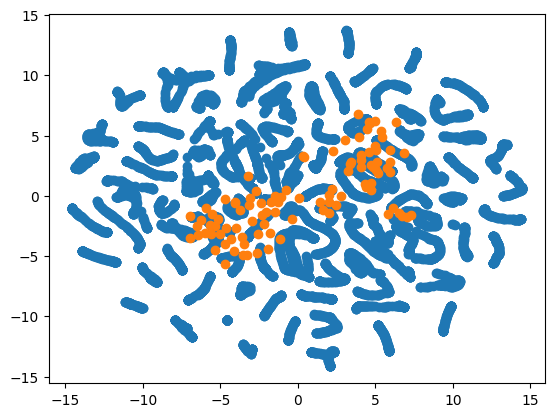

In [44]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_ts_embs = tsne.fit_transform(train_ts_embs[:10000])
tsne_proto = tsne.fit_transform(prototypes)
plt.scatter(tsne_ts_embs[:, 0], tsne_ts_embs[:, 1])
plt.scatter(tsne_proto[:, 0], tsne_proto[:, 1])